In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk 

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import KNNImputer
pd.set_option("display.max_rows", 20000)

In [2]:
df = pd.read_excel(r"C:\Users\hp\Downloads\car_dataset.xlsx")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
df.isnull().mean()*100

Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.251805
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64

In [9]:
df.shape

(11914, 16)

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(11199, 16)

In [102]:
df.columns

Index(['index', 'Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'col1_part1', 'col1_part2',
       'col1_part3', 'col1_part4', 'col1_part5'],
      dtype='object')

In [12]:
df["Engine Fuel Type"].value_counts()

Engine Fuel Type
regular unleaded                                6658
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

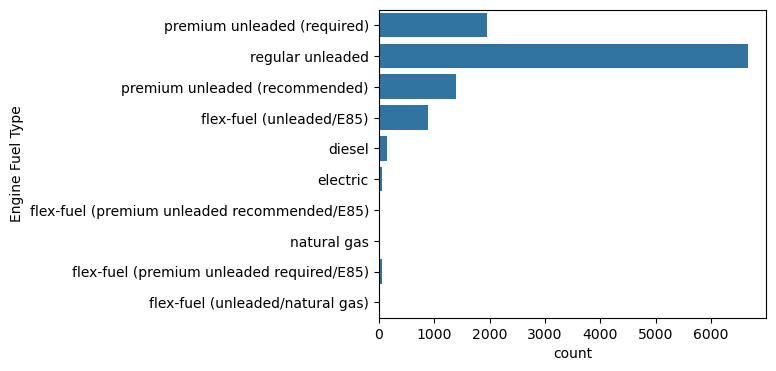

In [13]:
# lets visualize Engine fuel type column
figure = plt.figure(figsize = (5,4))
sns.countplot(df["Engine Fuel Type"])
plt.show()

In [14]:
df["Engine HP"].value_counts()

Engine HP
200.0     378
170.0     261
240.0     251
285.0     246
210.0     243
185.0     227
138.0     191
300.0     189
150.0     186
220.0     171
355.0     158
155.0     149
381.0     141
140.0     135
420.0     133
190.0     132
260.0     131
290.0     130
160.0     125
310.0     123
275.0     123
180.0     119
280.0     115
250.0     110
261.0     100
148.0      94
332.0      93
325.0      93
182.0      87
175.0      87
305.0      87
302.0      87
268.0      84
201.0      84
184.0      84
130.0      84
158.0      82
295.0      80
278.0      75
270.0      73
252.0      71
320.0      69
205.0      69
283.0      68
225.0      67
292.0      67
120.0      66
230.0      65
510.0      63
365.0      63
306.0      62
173.0      59
127.0      58
166.0      57
330.0      57
255.0      56
132.0      56
272.0      54
188.0      54
335.0      54
282.0      52
400.0      50
168.0      50
203.0      50
165.0      49
195.0      49
227.0      49
265.0      47
385.0      47
430.0      45
245.0     

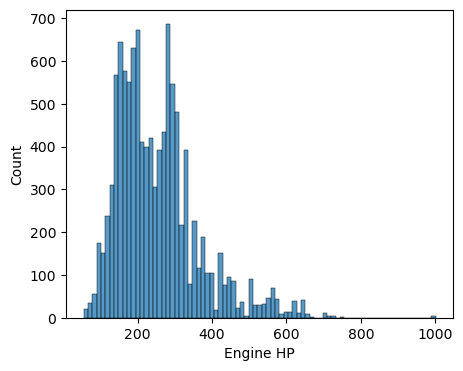

In [15]:
# lets visualize Engine HP 
figure = plt.figure(figsize = (5,4))
sns.histplot(df["Engine HP"])
plt.show()

In [16]:
df["Engine Cylinders"].value_counts()

Engine Cylinders
4.0     4362
6.0     4291
8.0     1965
12.0     228
5.0      169
10.0      65
0.0       56
3.0       30
16.0       3
Name: count, dtype: int64

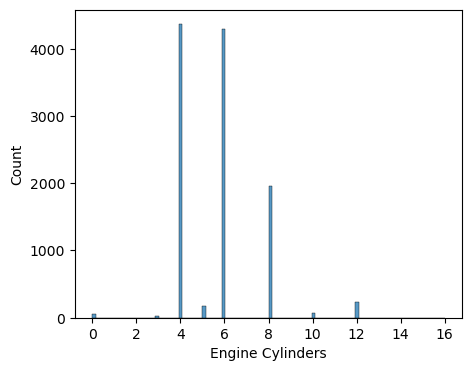

In [17]:
# lets visualize Engine Cylinders 
figure = plt.figure(figsize = (5,4))
sns.histplot(df["Engine Cylinders"])
plt.show()

In [18]:
df["Number of Doors"].value_counts()

Number of Doors
4.0    7960
2.0    2877
3.0     356
Name: count, dtype: int64

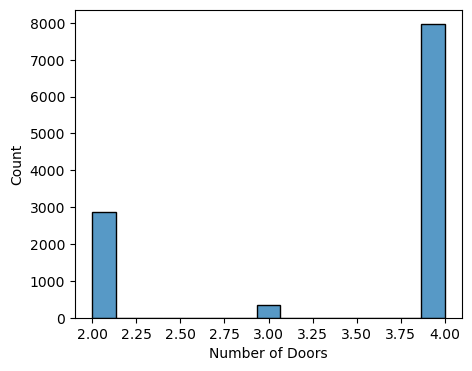

In [19]:
# lets visualize Number of Doors
figure = plt.figure(figsize = (5,4))
sns.histplot(df["Number of Doors"])
plt.show()

In [20]:
df["Market Category"].value_counts()

Market Category
Crossover                                                 1075
Flex Fuel                                                  855
Luxury                                                     819
Luxury,Performance                                         659
Hatchback                                                  574
Performance                                                520
Crossover,Luxury                                           406
Luxury,High-Performance                                    334
Exotic,High-Performance                                    254
Factory Tuner,Luxury,High-Performance                      215
Hatchback,Performance                                      198
High-Performance                                           198
Hybrid                                                     121
Crossover,Luxury,Performance                               112
Factory Tuner,High-Performance                             104
Flex Fuel,Performance                  

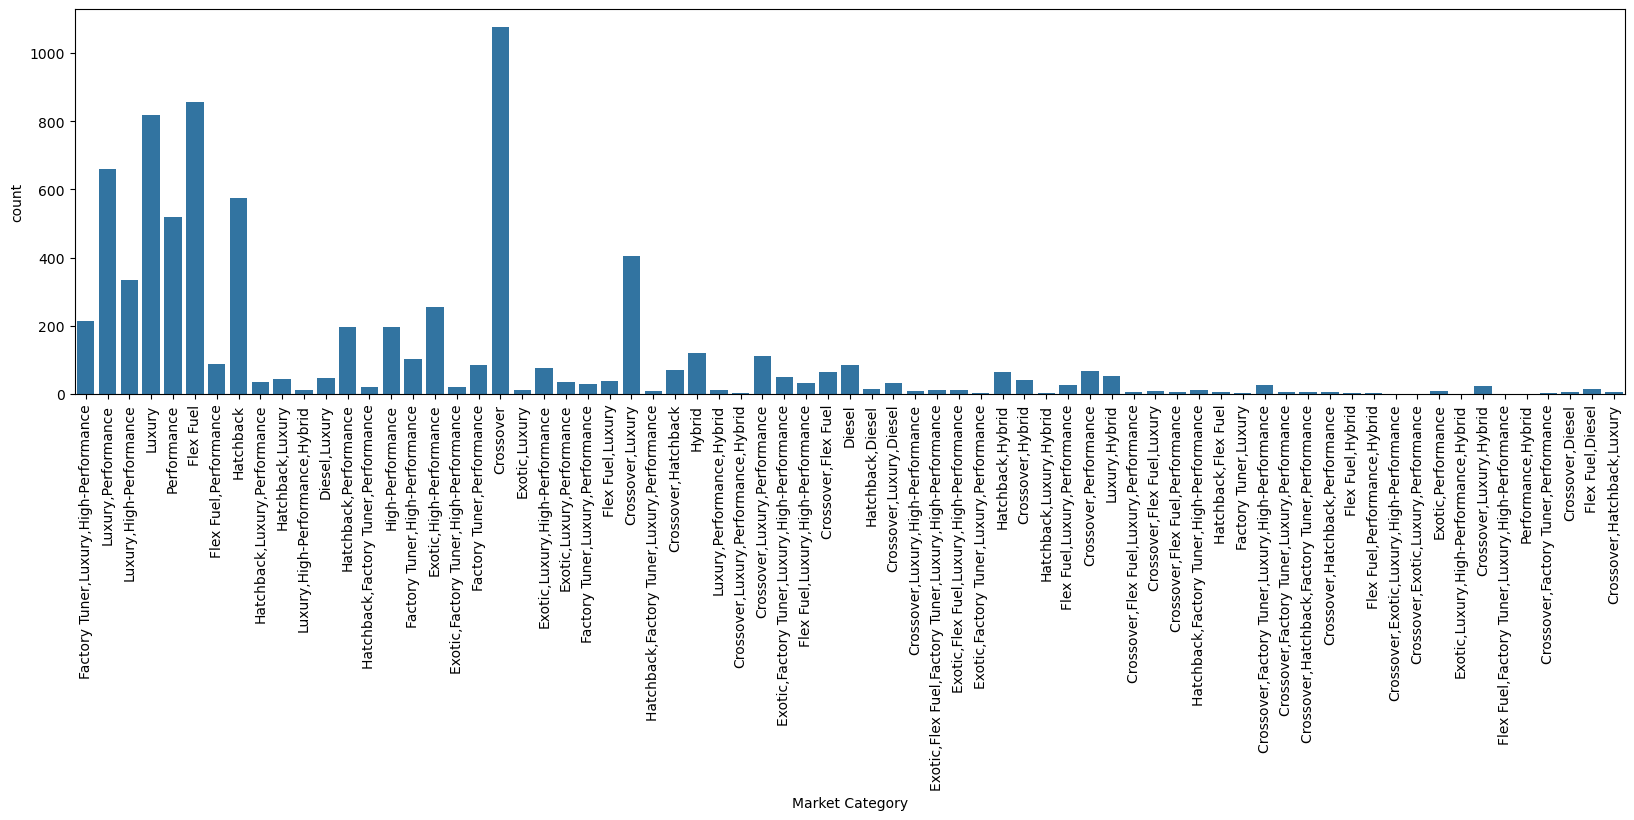

In [21]:
# lets visualize Market Category column
figure = plt.figure(figsize = (20,5))
sns.countplot(x= df["Market Category"])
plt.xticks(rotation = 90)
plt.show()

In [22]:
x = list(zip(list(df.columns), list(df.isnull().mean()*100)))

In [23]:
missing_columns = []
for i,j in x:
    if j > 0:
        missing_columns.append(i)

In [24]:
missing_columns

['Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Market Category']

In [25]:
# lets find out the number of rows we will loose if we delete rows with null values 
len(df) - len(df.dropna())

3464

In [26]:
len(df) - len(df.drop(["Market Category"],axis = 1).dropna())

102

In [27]:
len(df)

11199

In [28]:
len(df.dropna())

7735

In [29]:
x = df.drop(["Market Category"], axis = 1)

In [30]:
len(x.dropna())

11097

In [31]:
len(df[df["Market Category"].isnull()])

3376

# Lets find the cars with similar specifications as of the cars having N/A in their Market category column 
for that first we need to drop the rows having null values in the columns other than Market Category, as it wont affect the dataset, as only 102 rows will get deleted out of 11199 rows. 

In [32]:
sample_df = df.copy()

In [33]:
sample_df_without_null = sample_df.drop(["Market Category"],axis = 1).dropna()

In [34]:
df_col_with_null = sample_df["Market Category"]

In [35]:
result_df = pd.concat([df_col_with_null, sample_df_without_null], axis=1).dropna(subset=sample_df.columns.difference(["Market Category"]), how='all')

Now we will find the cars with similar specifications 

In [36]:
result_df.head()

,Market Category,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,"Factory Tuner,Luxury,High-Performance",BMW,1 Series M,2011.0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26.0,19.0,3916.0,46135.0
1,"Luxury,Performance",BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28.0,19.0,3916.0,40650.0
2,"Luxury,High-Performance",BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28.0,20.0,3916.0,36350.0
3,"Luxury,Performance",BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28.0,18.0,3916.0,29450.0
4,Luxury,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28.0,18.0,3916.0,34500.0


In [37]:
x = result_df[result_df.isnull()]

In [38]:
y = list(result_df.drop(["Market Category", "Popularity", "MSRP"], axis = 1).columns)

In [39]:
y 

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg']

In [40]:
# for _, row in x.iterrows():
#     spec_condition = (result_df[y] == row[y]).all(axis =1)
#     market_condition = result_df.notna()
#     matches = result_df[spec_condition & market_condition]
#     matching_cars = pd.concat([matching_cars, matches])

In [41]:
# matching_cars.drop_duplicates(inplace = True)

In [42]:
# matching_cars.shape

In [43]:
merged_df = x.merge(result_df, on = y,  suffixes=('_na', ''), how='left')
matching_cars = merged_df[merged_df['Market Category'].notna()]
matching_cars = matching_cars.drop_duplicates()


In [44]:
matching_cars

,Market Category_na,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity_na,MSRP_na,Market Category,Popularity,MSRP


we are not getting any car similar to the car having na in market category so lets impute it with the help of KNN imputer
for that we need to encode our data keeping Null values as it is 

In [45]:
ss = StandardScaler()
oe = OrdinalEncoder()
le = LabelEncoder()
result_df.reset_index(inplace = True)
res_df = result_df.copy()
res_df.shape

(11097, 17)

In [46]:
cat_col = list(res_df.select_dtypes("object").columns)
cat_col

['Market Category',
 'Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

In [47]:
num_col = list(res_df.select_dtypes(["int64", "float64"]).columns)
num_col

['index',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [48]:
res_df[cat_col] = oe.fit_transform(res_df[cat_col].astype(str))

In [49]:
res_df[num_col] = ss.fit_transform(res_df[num_col])

In [50]:
# index of the null values in the column Market Category

index_list = list(result_df[result_df["Market Category"].isnull()].index)

In [51]:
# looking for the categories for the column Market Category
column_index = res_df.columns.get_loc("Market Category")
classes = oe.categories_[column_index]
print(classes)

['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'BMW' 'Bentley' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ferrari' 'Ford'
 'GMC' 'Genesis' 'HUMMER' 'Honda' 'Hyundai' 'Infiniti' 'Kia' 'Lamborghini'
 'Land Rover' 'Lexus' 'Lincoln' 'Lotus' 'Maserati' 'Maybach' 'Mazda'
 'McLaren' 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Oldsmobile' 'Plymouth'
 'Pontiac' 'Porsche' 'Rolls-Royce' 'Saab' 'Scion' 'Spyker' 'Subaru'
 'Suzuki' 'Toyota' 'Volkswagen' 'Volvo']


In [52]:
# looking for the values assigned to the market category where the there is nan value through indexing 

for i in index_list:
    print(f"index: {i}")
    print(res_df.loc[i, "Market Category"])

index: 82
70.0
index: 85
70.0
index: 86
70.0
index: 191
70.0
index: 192
70.0
index: 193
70.0
index: 194
70.0
index: 197
70.0
index: 198
70.0
index: 199
70.0
index: 201
70.0
index: 202
70.0
index: 203
70.0
index: 204
70.0
index: 207
70.0
index: 208
70.0
index: 209
70.0
index: 210
70.0
index: 211
70.0
index: 212
70.0
index: 213
70.0
index: 216
70.0
index: 217
70.0
index: 219
70.0
index: 347
70.0
index: 348
70.0
index: 349
70.0
index: 355
70.0
index: 360
70.0
index: 362
70.0
index: 365
70.0
index: 366
70.0
index: 367
70.0
index: 368
70.0
index: 372
70.0
index: 374
70.0
index: 377
70.0
index: 382
70.0
index: 385
70.0
index: 386
70.0
index: 394
70.0
index: 397
70.0
index: 460
70.0
index: 461
70.0
index: 462
70.0
index: 463
70.0
index: 464
70.0
index: 465
70.0
index: 466
70.0
index: 467
70.0
index: 468
70.0
index: 469
70.0
index: 470
70.0
index: 471
70.0
index: 472
70.0
index: 473
70.0
index: 474
70.0
index: 475
70.0
index: 476
70.0
index: 477
70.0
index: 478
70.0
index: 479
70.0
index: 480


In [53]:
res_df.dtypes

index                float64
Market Category      float64
Make                 float64
Model                float64
Year                 float64
Engine Fuel Type     float64
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels        float64
Number of Doors      float64
Vehicle Size         float64
Vehicle Style        float64
highway MPG          float64
city mpg             float64
Popularity           float64
MSRP                 float64
dtype: object

In [54]:
for i in index_list:
    print(f"index: {i}")
    res_df.loc[i, "Market Category"] = np.nan

index: 82
index: 85
index: 86
index: 191
index: 192
index: 193
index: 194
index: 197
index: 198
index: 199
index: 201
index: 202
index: 203
index: 204
index: 207
index: 208
index: 209
index: 210
index: 211
index: 212
index: 213
index: 216
index: 217
index: 219
index: 347
index: 348
index: 349
index: 355
index: 360
index: 362
index: 365
index: 366
index: 367
index: 368
index: 372
index: 374
index: 377
index: 382
index: 385
index: 386
index: 394
index: 397
index: 460
index: 461
index: 462
index: 463
index: 464
index: 465
index: 466
index: 467
index: 468
index: 469
index: 470
index: 471
index: 472
index: 473
index: 474
index: 475
index: 476
index: 477
index: 478
index: 479
index: 480
index: 481
index: 482
index: 483
index: 484
index: 485
index: 523
index: 524
index: 527
index: 536
index: 538
index: 541
index: 544
index: 545
index: 548
index: 549
index: 550
index: 551
index: 552
index: 553
index: 554
index: 555
index: 556
index: 557
index: 558
index: 559
index: 560
index: 601
index: 602
in

In [55]:
for i in index_list:
    print(f"index: {i}")
    print(res_df.loc[i, "Market Category"])

index: 82
nan
index: 85
nan
index: 86
nan
index: 191
nan
index: 192
nan
index: 193
nan
index: 194
nan
index: 197
nan
index: 198
nan
index: 199
nan
index: 201
nan
index: 202
nan
index: 203
nan
index: 204
nan
index: 207
nan
index: 208
nan
index: 209
nan
index: 210
nan
index: 211
nan
index: 212
nan
index: 213
nan
index: 216
nan
index: 217
nan
index: 219
nan
index: 347
nan
index: 348
nan
index: 349
nan
index: 355
nan
index: 360
nan
index: 362
nan
index: 365
nan
index: 366
nan
index: 367
nan
index: 368
nan
index: 372
nan
index: 374
nan
index: 377
nan
index: 382
nan
index: 385
nan
index: 386
nan
index: 394
nan
index: 397
nan
index: 460
nan
index: 461
nan
index: 462
nan
index: 463
nan
index: 464
nan
index: 465
nan
index: 466
nan
index: 467
nan
index: 468
nan
index: 469
nan
index: 470
nan
index: 471
nan
index: 472
nan
index: 473
nan
index: 474
nan
index: 475
nan
index: 476
nan
index: 477
nan
index: 478
nan
index: 479
nan
index: 480
nan
index: 481
nan
index: 482
nan
index: 483
nan
index: 484
na

In [56]:
res_df.isnull().sum()

index                   0
Market Category      3362
Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [57]:
#lets fit it to the KNN imputer 
imputer = KNNImputer()

df_imputed = pd.DataFrame(imputer.fit_transform(res_df.drop(["Make","Model","Number of Doors","Popularity", "MSRP"], axis = 1)), columns=res_df.drop(["Make","Model","Number of Doors","Popularity", "MSRP"], axis = 1).columns)

In [58]:
df_imputed.head()

,index,Market Category,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg
0,-1.713918,37.0,0.042343,7.0,0.73959,0.176599,3.0,3.0,0.0,8.0,-0.036552,-0.045521
1,-1.713629,66.0,0.042343,7.0,0.42187,0.176599,3.0,3.0,0.0,6.0,0.230830,-0.045521
2,-1.713340,63.0,0.042343,7.0,0.42187,0.176599,3.0,3.0,0.0,8.0,0.230830,0.105901
3,-1.713051,66.0,0.042343,7.0,-0.21357,0.176599,3.0,3.0,0.0,8.0,0.230830,-0.196942
4,-1.712762,62.0,0.042343,7.0,-0.21357,0.176599,3.0,3.0,0.0,6.0,0.230830,-0.196942


In [59]:
# looking for the values assigned to the market category where the there was nan value through indexing in imputed df

for i in index_list:
    print(f"index: {i}")
    print(df_imputed.loc[i, "Market Category"])

index: 82
56.4
index: 85
56.4
index: 86
56.4
index: 191
64.8
index: 192
68.0
index: 193
68.0
index: 194
64.0
index: 197
64.0
index: 198
64.0
index: 199
64.8
index: 201
64.0
index: 202
68.0
index: 203
64.0
index: 204
64.0
index: 207
68.0
index: 208
68.0
index: 209
64.8
index: 210
64.0
index: 211
63.8
index: 212
63.8
index: 213
64.2
index: 216
64.2
index: 217
68.0
index: 219
63.8
index: 347
68.0
index: 348
68.0
index: 349
68.0
index: 355
68.0
index: 360
68.0
index: 362
68.0
index: 365
68.0
index: 366
68.0
index: 367
68.0
index: 368
68.0
index: 372
68.0
index: 374
68.0
index: 377
68.0
index: 382
68.0
index: 385
68.0
index: 386
67.6
index: 394
68.0
index: 397
67.6
index: 460
0.0
index: 461
0.0
index: 462
0.0
index: 463
0.0
index: 464
0.0
index: 465
0.0
index: 466
0.0
index: 467
0.0
index: 468
0.0
index: 469
0.0
index: 470
0.0
index: 471
0.0
index: 472
0.0
index: 473
0.0
index: 474
0.0
index: 475
0.0
index: 476
0.0
index: 477
0.0
index: 478
0.0
index: 479
0.0
index: 480
0.0
index: 481
0.0
i

In [60]:
res_df.shape

(11097, 17)

In [61]:
df_imputed.shape

(11097, 12)

In [62]:
res_df.dtypes 

index                float64
Market Category      float64
Make                 float64
Model                float64
Year                 float64
Engine Fuel Type     float64
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels        float64
Number of Doors      float64
Vehicle Size         float64
Vehicle Style        float64
highway MPG          float64
city mpg             float64
Popularity           float64
MSRP                 float64
dtype: object

In [63]:
df_imputed.dtypes

index                float64
Market Category      float64
Year                 float64
Engine Fuel Type     float64
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels        float64
Vehicle Size         float64
Vehicle Style        float64
highway MPG          float64
city mpg             float64
dtype: object

In [64]:
res_df.isnull().sum()

index                   0
Market Category      3362
Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [65]:
df_imputed.isnull().sum()

index                0
Market Category      0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
dtype: int64

In [73]:
df_imputed[['Make', "Model"]] = res_df[['Make', 'Model']]
df_imputed[cat_col] = oe.inverse_transform(df_imputed[cat_col])

In [74]:
df_imputed.head()

,index,Market Category,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Make,Model
0,-1.713918,"Factory Tuner,Luxury,High-Performance",0.042343,premium unleaded (required),0.73959,0.176599,MANUAL,rear wheel drive,Compact,Coupe,-0.036552,-0.045521,BMW,1 Series M
1,-1.713629,"Luxury,Performance",0.042343,premium unleaded (required),0.42187,0.176599,MANUAL,rear wheel drive,Compact,Convertible,0.230830,-0.045521,BMW,1 Series
2,-1.713340,"Luxury,High-Performance",0.042343,premium unleaded (required),0.42187,0.176599,MANUAL,rear wheel drive,Compact,Coupe,0.230830,0.105901,BMW,1 Series
3,-1.713051,"Luxury,Performance",0.042343,premium unleaded (required),-0.21357,0.176599,MANUAL,rear wheel drive,Compact,Coupe,0.230830,-0.196942,BMW,1 Series
4,-1.712762,Luxury,0.042343,premium unleaded (required),-0.21357,0.176599,MANUAL,rear wheel drive,Compact,Convertible,0.230830,-0.196942,BMW,1 Series


In [75]:
print(df_imputed["Market Category"].isnull().sum())

0


In [76]:
created_df = result_df.copy()

In [77]:
created_df.shape, created_df.isnull().sum()

((11097, 17),
 index                   0
 Market Category      3362
 Make                    0
 Model                   0
 Year                    0
 Engine Fuel Type        0
 Engine HP               0
 Engine Cylinders        0
 Transmission Type       0
 Driven_Wheels           0
 Number of Doors         0
 Vehicle Size            0
 Vehicle Style           0
 highway MPG             0
 city mpg                0
 Popularity              0
 MSRP                    0
 dtype: int64)

In [78]:
created_df["Market Category"] = df_imputed["Market Category"]

In [79]:
created_df.shape, created_df.isnull().sum()

((11097, 17),
 index                0
 Market Category      0
 Make                 0
 Model                0
 Year                 0
 Engine Fuel Type     0
 Engine HP            0
 Engine Cylinders     0
 Transmission Type    0
 Driven_Wheels        0
 Number of Doors      0
 Vehicle Size         0
 Vehicle Style        0
 highway MPG          0
 city mpg             0
 Popularity           0
 MSRP                 0
 dtype: int64)

In [80]:
len(index_list)

3362

In [81]:
# looking for the values assigned to the market category where the there was nan value through indexing in created_df

for i in index_list:
    print(f"index: {i}")
    created_df.loc[i]

index: 82
index: 85
index: 86
index: 191
index: 192
index: 193
index: 194
index: 197
index: 198
index: 199
index: 201
index: 202
index: 203
index: 204
index: 207
index: 208
index: 209
index: 210
index: 211
index: 212
index: 213
index: 216
index: 217
index: 219
index: 347
index: 348
index: 349
index: 355
index: 360
index: 362
index: 365
index: 366
index: 367
index: 368
index: 372
index: 374
index: 377
index: 382
index: 385
index: 386
index: 394
index: 397
index: 460
index: 461
index: 462
index: 463
index: 464
index: 465
index: 466
index: 467
index: 468
index: 469
index: 470
index: 471
index: 472
index: 473
index: 474
index: 475
index: 476
index: 477
index: 478
index: 479
index: 480
index: 481
index: 482
index: 483
index: 484
index: 485
index: 523
index: 524
index: 527
index: 536
index: 538
index: 541
index: 544
index: 545
index: 548
index: 549
index: 550
index: 551
index: 552
index: 553
index: 554
index: 555
index: 556
index: 557
index: 558
index: 559
index: 560
index: 601
index: 602
in

In [82]:
created_df[["Market Category", "Engine Fuel Type", "Vehicle Style"]].iloc[index_list]

,Market Category,Engine Fuel Type,Vehicle Style
82,"Hatchback,Luxury",regular unleaded,Coupe
85,"Hatchback,Luxury",regular unleaded,Coupe
86,"Hatchback,Luxury",regular unleaded,Coupe
191,"Luxury,High-Performance,Hybrid",regular unleaded,Sedan
192,Performance,regular unleaded,Sedan
193,Performance,regular unleaded,Sedan
194,"Luxury,High-Performance,Hybrid",regular unleaded,Sedan
197,"Luxury,High-Performance,Hybrid",regular unleaded,Sedan
198,"Luxury,High-Performance,Hybrid",regular unleaded,Sedan
199,"Luxury,High-Performance,Hybrid",regular unleaded,Sedan


In [108]:
# lets bring the dataframe in csv format to visualize it in the power bi 
created_df.to_csv(r"C:\Users\hp\Desktop\car_dataset.csv")